In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
import keras
from matplotlib import rc
rc("text", usetex=True)
rc("font", family = "serif")
rc("figure",figsize=(6,4))
%config InlineBackend.figure_format = 'retina'
from phase_mixing_utils import *
from skimage import data
import skimage

Using TensorFlow backend.


In [2]:
hdf = skimage.color.rgb2gray(skimage.data.hubble_deep_field())

(872, 1000)


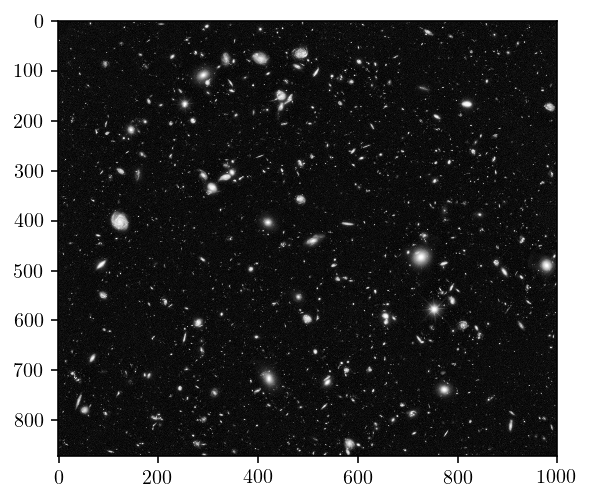

In [3]:
plt.imshow(hdf,cmap="gray")
print hdf.shape
plt.show()

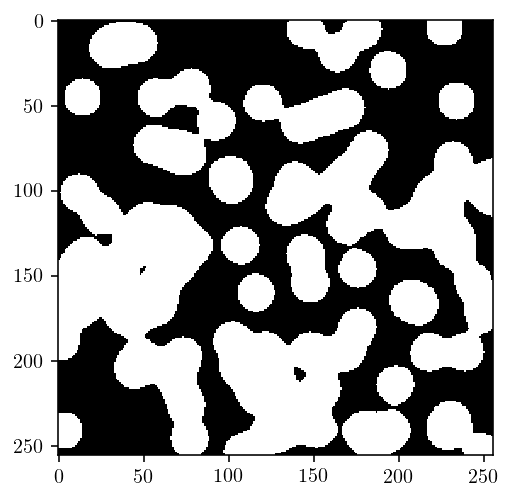

In [4]:
blobs = data.binary_blobs(256)
plt.imshow(blobs,cmap="gray")
plt.show()

In [5]:
ft_blobs = np.fft.fft2(blobs)
#phase_intensity_plot(np.fft.fftshift(ft_blobs)[100:150,100:150])

Blobs arent the most fun fourier transform. Zooming in is good though.

In [6]:
ft_hdf = np.fft.fft2(hdf)
#phase_intensity_plot(np.fft.fftshift(ft_hdf))

Lesson: dont want image to be too high res

In [7]:
plt.imshow(np.real_if_close(np.fft.ifft2(ft_blobs)))
#plt.show()

In [8]:
def sq_lat(n,p):
    """Generate a nxn square lattice with period p
        The first lattice point is at [(p-1)/2,(p-1)/2"""
    lattice = np.zeros((n,n))
    for i in range(40):
        for j in range(40):
            lattice[(p-1)/2+p*i,(p-1)/2+p*j] = 1
    return lattice
lat = sq_lat(200,5)

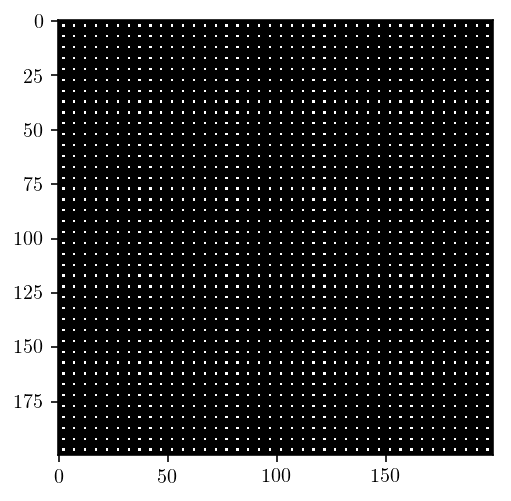

In [9]:
plt.imshow(lat,cmap="gray")
plt.show()

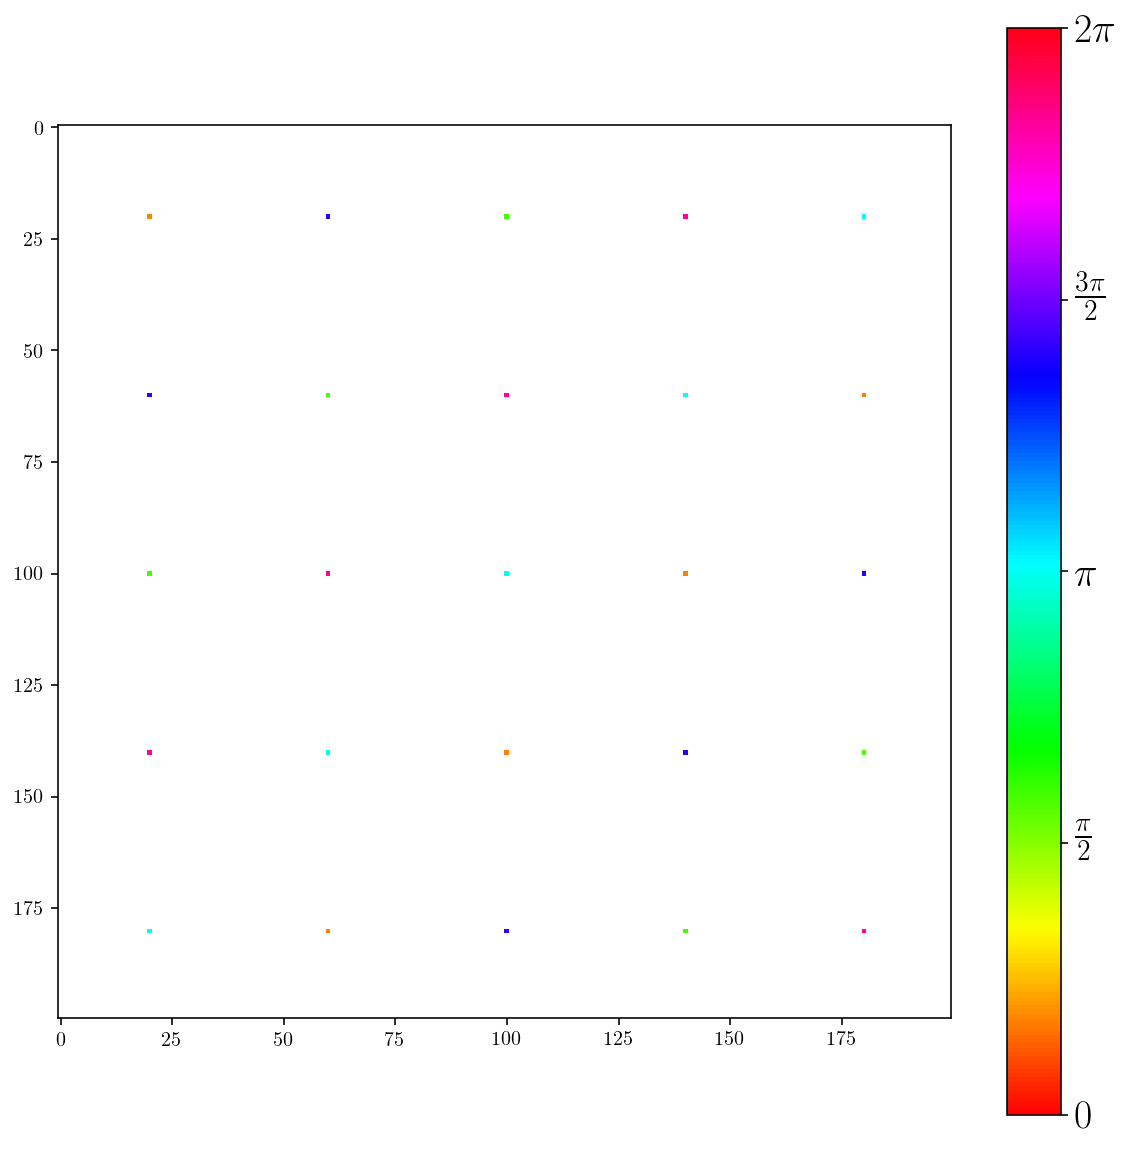

In [10]:
ft_lat = np.fft.fft2(lat)
phase_intensity_plot(np.fft.fftshift(ft_lat))

FT of sqare lattice is a sqare lattice 

Try a lattice with structure - square lattice with a 3 pixel L basis

In [11]:
unit_cell = np.zeros((5,5))
unit_cell[3,3]=1
unit_cell[3,2]=1
unit_cell[2,3]=1
lat2 = np.tile(unit_cell,(40,40))
plt.figure(figsize=(10,10))
plt.imshow(lat2)
#plt.show()

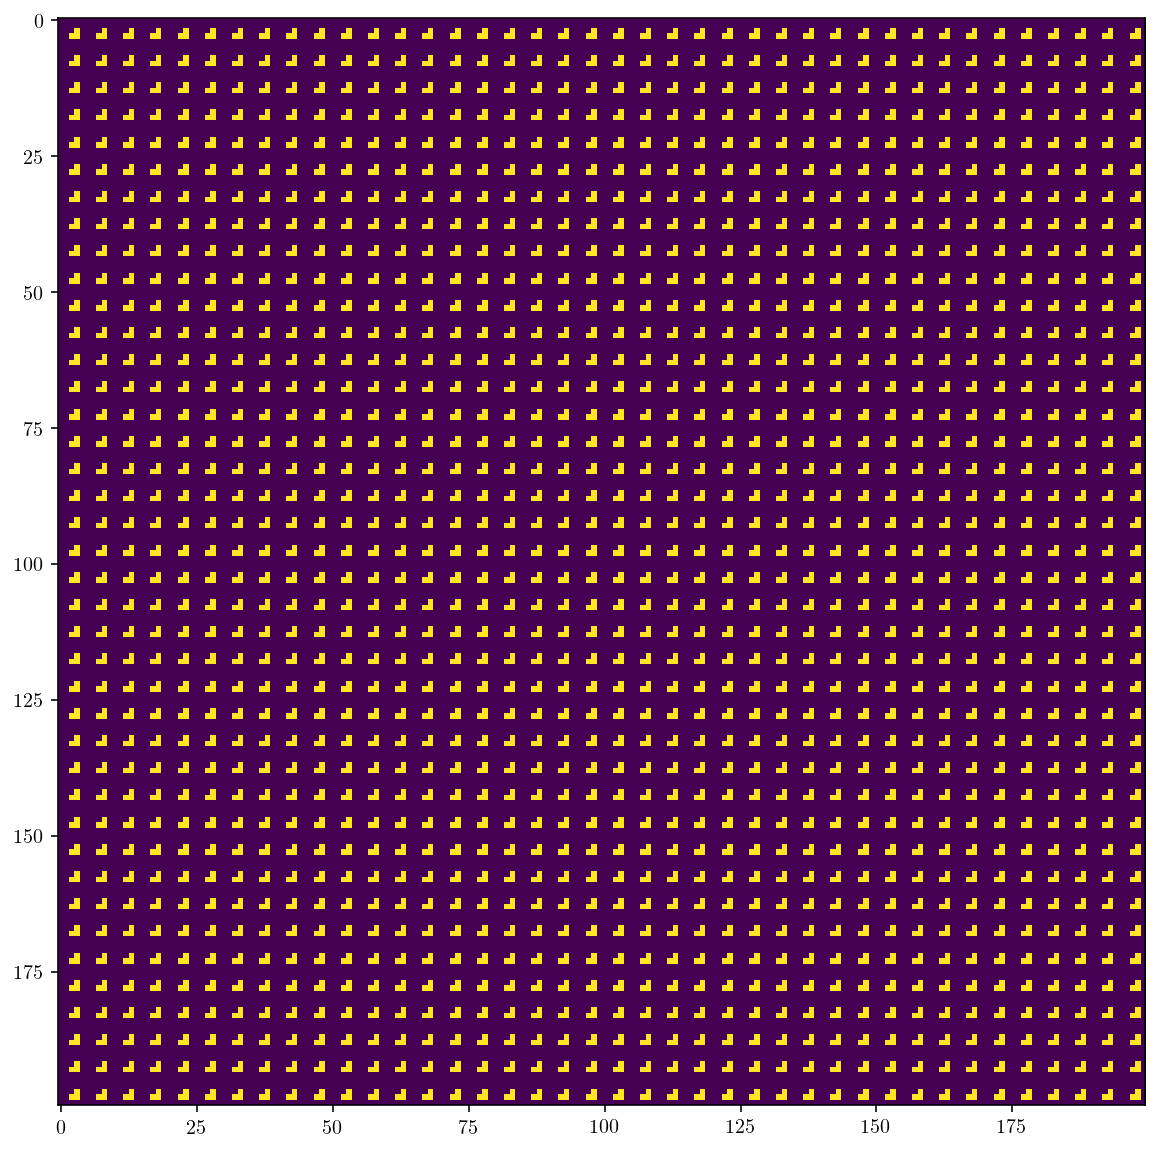

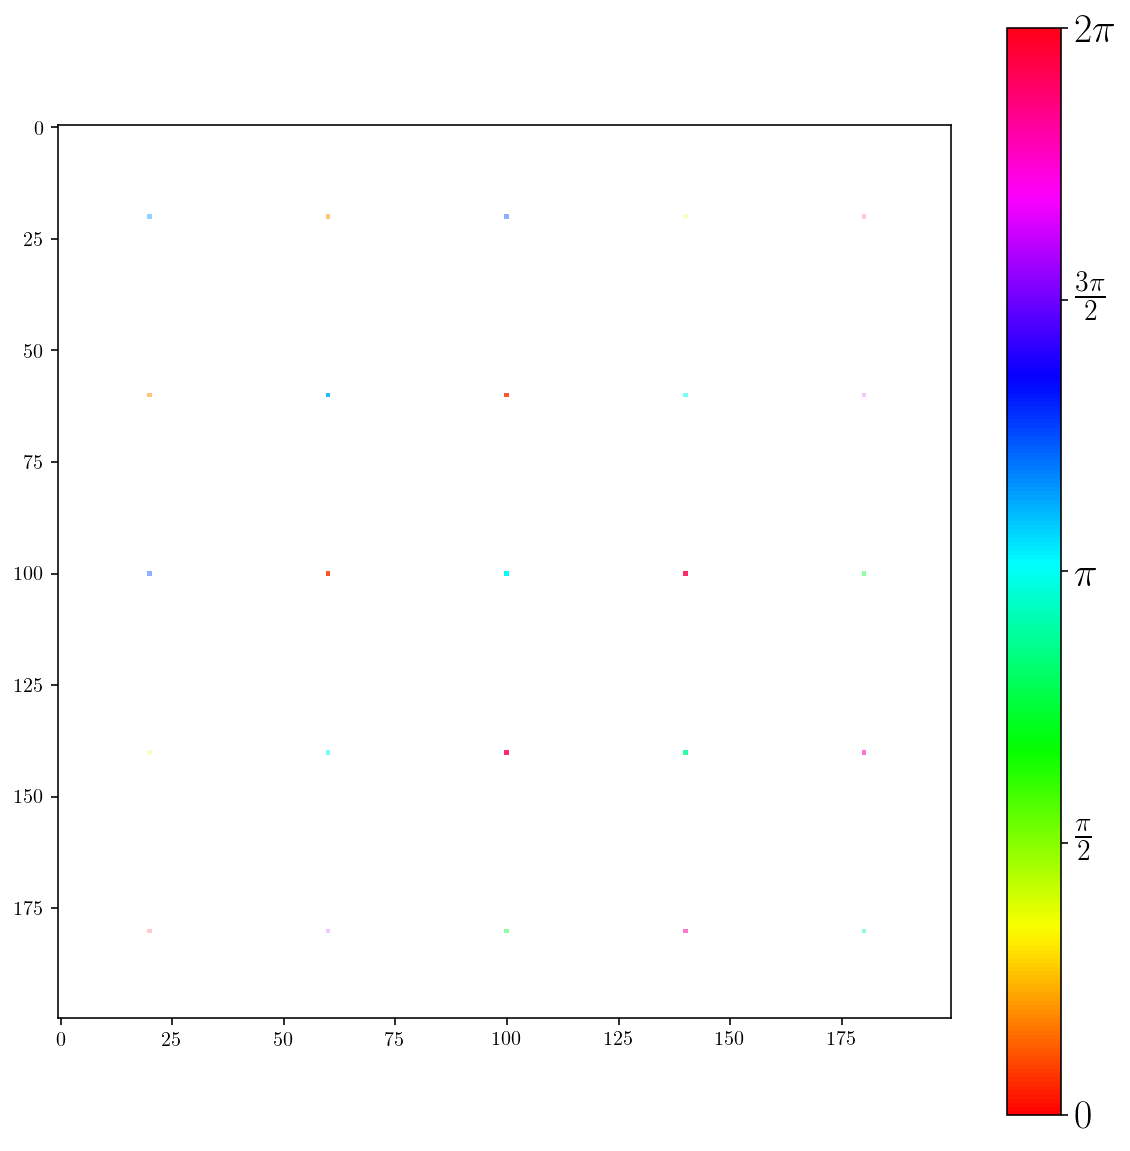

In [12]:
ft_lat2 = np.fft.fft2(lat2)
phase_intensity_plot(np.fft.fftshift(ft_lat2))

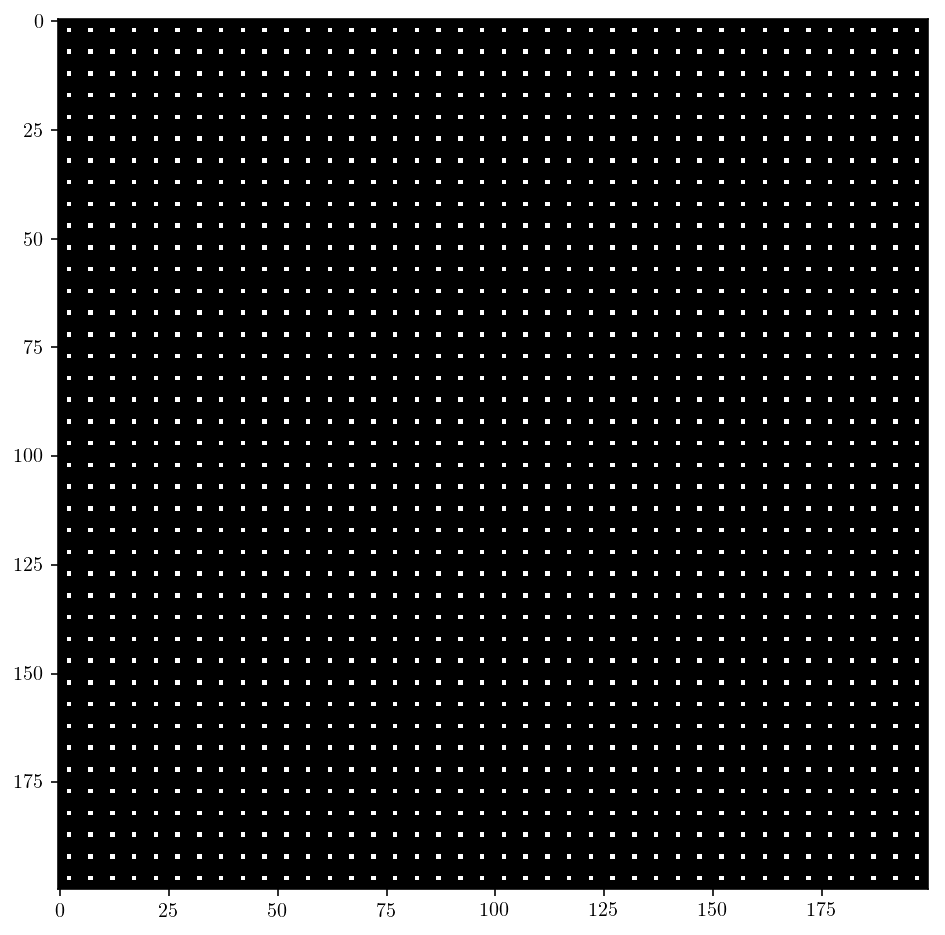

In [13]:
smpl_sq_mag = get_mag(ft_lat)
basis_sq_phase = get_phase(ft_lat2)
basis_smpl = mix_FT(lat,lat)
#phase_intensity_plot(basis_smpl)
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(np.real(np.fft.ifft2(basis_smpl)),cmap="gray")
plt.show()

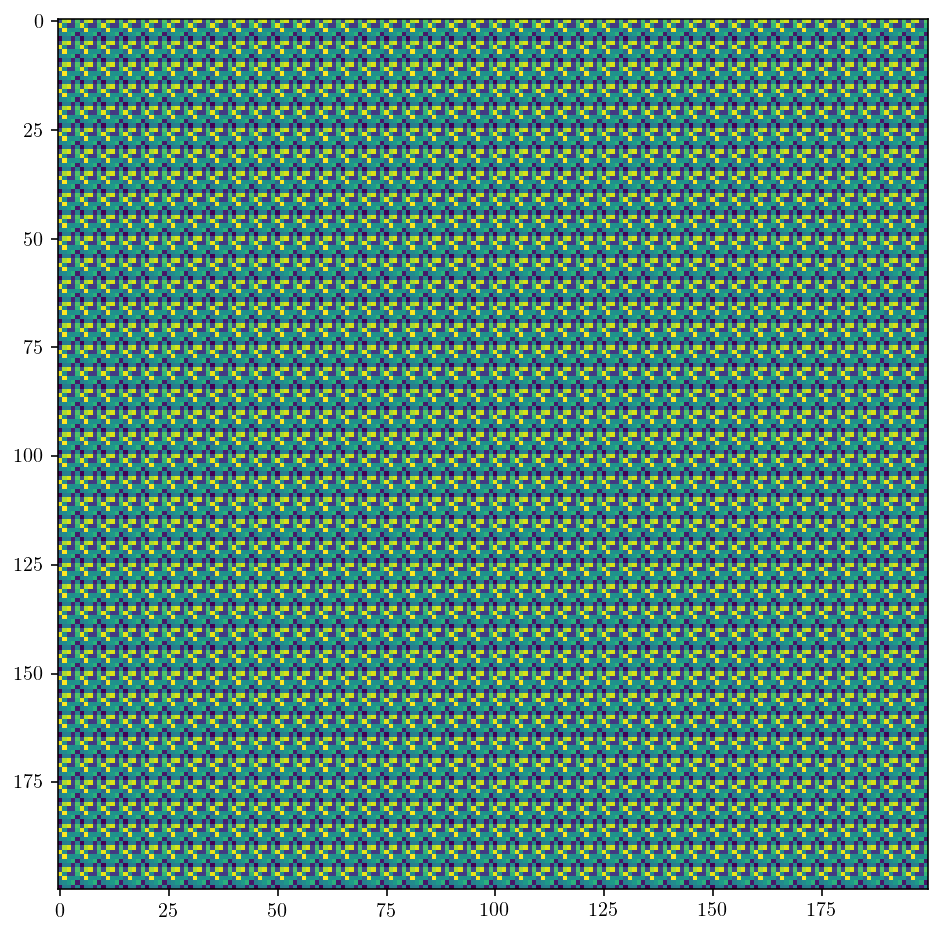

In [14]:
random = np.random.random((200,200))
smpl_sq_rphases = mix_FT(lat,random)
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(np.real(np.fft.ifft2(smpl_sq_rphases)))
plt.show()

In [15]:
iso_replace = lat+lat2
plt.imshow(iso_replace)
#plt.show()

In [16]:
ft_iso = np.fft.fft2(iso_replace)

In [17]:
diff = ft_iso-ft_lat

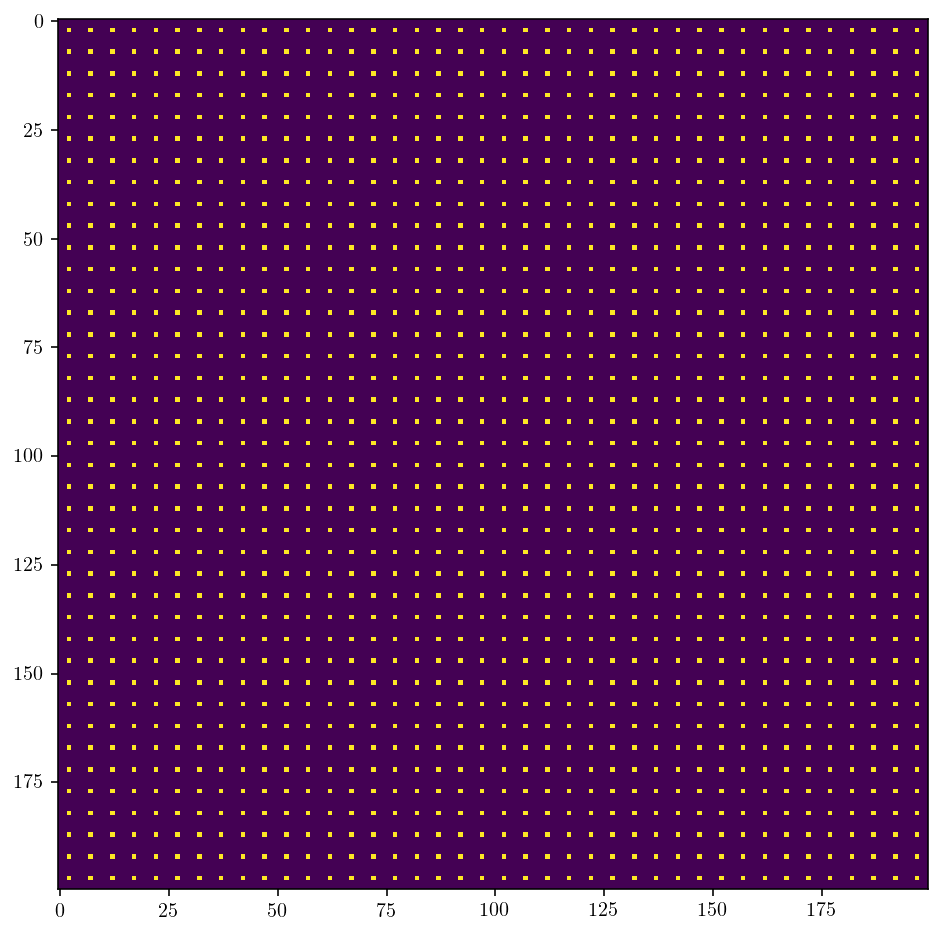

In [25]:
plt.figure(figsize=(8,8))
plt.imshow(lat)
plt.show()

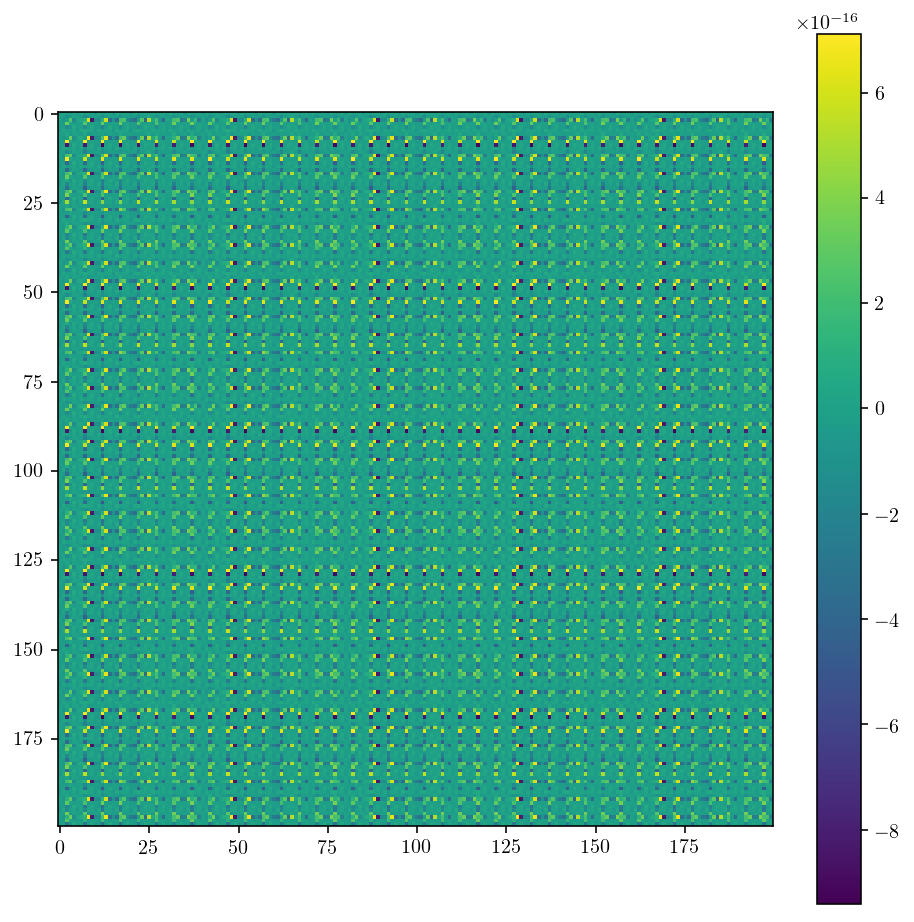

In [24]:
plt.figure(figsize=(8,8))
plt.imshow((lat-np.real_if_close(np.fft.ifft2(mix_FT(lat,lat)))))
plt.colorbar()
plt.show()

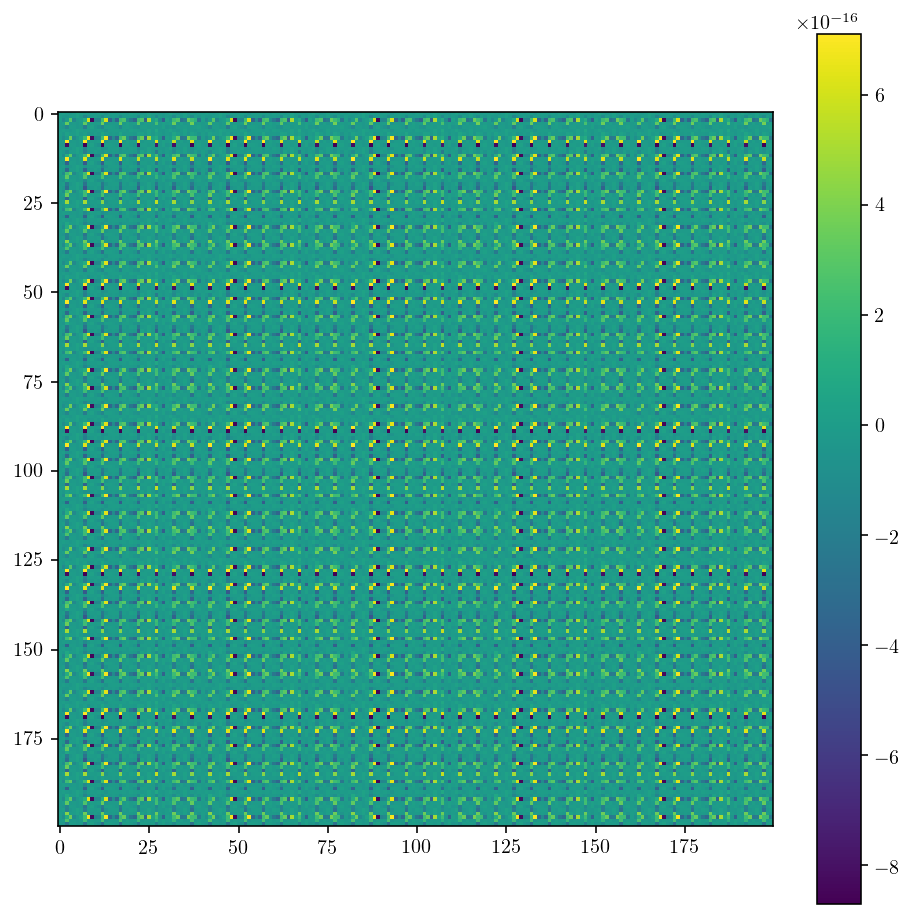

In [20]:
plt.figure(figsize=(8,8))
plt.imshow((lat-np.real_if_close(np.fft.ifft2(np.fft.fft2(lat)))))
plt.colorbar()
plt.show()

In [21]:
a = 2+3j

In [22]:
np.abs(a)

3.6055512754639891

In [23]:
np.sqrt(2**2+3**2)

3.6055512754639891